
# Topics

## 1. Class - Continued


# Class

In [1]:
'''
String is a class of ojects that have various methods.  One of these is .split()

'''
strg = 'Hello world.  Hello San Francisco.'

strg_split = strg.split('.')
print strg_split

['Hello world', '  Hello San Francisco', '']


## Breakout Problem:

Make a class F that implements the function 
f(x; a, w) = e − a*x*sin(w*x). 

Write two main programs that do:

a) To practice changing attributes and to illustrate that an instance of this class can be used as a function and a string.  


from numpy import pi

f = F(a = 1.0, w = 0.1)

print f(pi)

f.a = 2

print f(pi)

print f         \# Use \_\_str\_\_ and one should get, in the present case: e - a\*x\*sin(w\*x); parameters: a = 2, w = 0.1.

b) To further illustrate that an instance of this class can be used as a function.

from scipy.integrate import quad

f = F(a = 1.0, w = 0.1)

x1 = pi/3

x2 = 2\*pi/3

It should print out the followig statement:

The integral of f(x; a, w) = e − ax sin(wx) between x = pi/3 and 2\*pi/3 is \*the result of the integral you get\*.

### The formula f(x; a, w) = e − ax sin(wx) should be lifted from the __str__ method instead of being re-written.
### This is the more elegant way of doing things, and it avoids inconsistency.

In [45]:
'''Breakout Solution: First, class definition''' 
import scipy.integrate.quad

def fval(a, w, x):
    from numpy import e, sin
    return e - a*x*sin(w*x)
    
class F:
    
    def __init__(self, a, w, c, d):
        self.a = a
        self.w = w
        
    def __call__(self, x, c, d):
        return quad(fval(self.a, self.w, x), c, d)
    
    def __str__(self):
        return 'e - a*x*sin(w*x); parameters: a = {:g}, w = {:g}.'.format(self.a, self.w)


In [52]:
from numpy import pi
from scipy.integrate import quad
f = F(a = 1.0, w = 0.1)
x1 = pi/3
x2 = 2*pi/3
print 'The integral of f(x; a, w) = {:s} between x = {:g} and {:g} is {:s}'.format(f.__str__().split(';')[0], x1, x2, quad(f, x1, x2))

The integral of f(x; a, w) = e - a*x*sin(w*x) between x = 1.0472 and 2.0944 is (2.579921828748761, 2.8642886160099147e-14)


In [3]:
'''Main program for part a)''' 
from numpy import pi
# Instantiation
f = F(a = 1.0, w = 0.1)
print f(pi)
# changing the attribute a.
f.a = 2   
# f acts like a function
print f(pi)
# f acts like a string
print f

1.7474763091
0.776670789734
e - a*x*sin(w*x); parameters: a = 2, w = 0.1.


In [4]:
'''Main program for part b)''' 
from numpy import pi
from scipy.integrate import quad
f = F(a = 1.0, w = 0.1)
x1 = pi/3
x2 = 2*pi/3
print 'The integral of f(x; a, w) = {:s} between x = {:g} and \
{:g} is {:g}.'.format(f.__str__().split(';')[0], x1, x2, quad(f, x1, x2)[0])

# Here the explicit invocation of the method __str__ is necessary because we want to use the split method on the 
# returned string. print f.split(';') won't work

# side note: quad is written in such a way that additional parameters *are* allowed, as long as they are passed as 
# keyword arugments:
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad

The integral of f(x; a, w) = e - a*x*sin(w*x) between x = 1.0472 and 2.0944 is 2.57992.


## Procedural/Functional vs. Object-Oriented Programming:

##"The focus of procedural programming is to break down a programming task into a collection of variables, data structures, and subroutines [i.e. functions in Python], whereas in object-oriented programming it is to break down a programming task into objects that expose behavior (methods) and data (members or attributes) using interfaces. The most important distinction is that while procedural programming uses procedures [functions in Python] to operate on data structures, object-oriented programming bundles the two together, so an "object", which is an instance of a class, operates on its "own" data structure."    (Wikipedia)

In [5]:
'''Procedural/Functional approach to a problem:''' 
import numpy as np
def perimeter(polygon):
    """Given a list of vector vertices (in proper order), 
    returns the perimeter for the associated polygon."""
    sum = 0
    for i in range(len(polygon)):
        vertex1 = polygon[i]
        # a nice way to make sure the last point connects with the the 0th point.
        vertex2 = polygon[(i+1) % len(polygon)]       
        
        distance = np.sqrt((vertex2[0]-vertex1[0])**2 + \
                             (vertex2[1]-vertex1[1])**2)
        sum += distance
    return sum 

print perimeter([[0,0],[1,0],[1,1],[0,1]])        # Returns 4.0
print perimeter([[0,-2],[1,1],[3,3],[5,1],[4,0],[4,-3]])  # Returns 17.356451097651515



4.0
17.3564510977


## Breakout: Turn the above into a class Polygon

##The concepts of classes and object-oriented programming first appeared in the Simula programming language in the 1960s. Simula was invented by the Norwegian computer scientists Ole-Johan Dahl and Kristen Nygaard, and the impact of the language is particularly evident in C++, Java, and C#, three of the most dominating programming languages in the world today. The invention of object-oriented programming was a remarkable achievement, and the professors Dahl and Nygaard recieved two very prestigious prizes: the von Neumann medal and the Turing prize (popularly known as the Nobel prize of computer science).


## A little more about the "self" 

In [42]:
class Line:
    '''a class for straight lines, y = c0 + c1*x'''
    import numpy as np
    def __init__(self, c0, c1):
        self.c0 = c0
        self.c1 = c1
    
    def __call__(self, x):
        return self.c0 + self.c1*x
    
    def table(self, L, R, n):
        '''returns a table with n points for x in domain [L, R].'''
        # initialize s to be an empty string.
        s = ''
        for x in np.linspace(L, R, n):
            # Note the usage here: self(x).  
            # This works because the special method __call__ is defined.
            y = self(x)        
            s += '{:12g} {:12g}\n'.format(x, y)
        return s


           1            7
           2           10
           3           13
           4           16
           5           19
           6           22
           7           25
           8           28
           9           31
          10           34



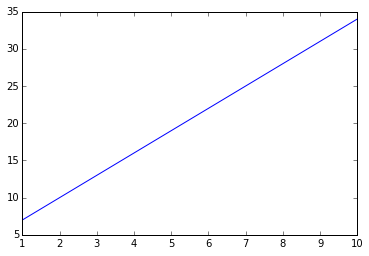

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
ln = Line(c0 = 4., c1 = 3.)
t = ln.table(1.0, 10., 10)
print t
x = np.linspace(1., 10., 10)
plt.plot (x, ln(x))
plt.show()


## Short breakout: A class for a parabola

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

para = Parabola(0., 2.5, 4.8)
t2 = para.table(0, 10., 20)
print t2
x = np.linspace(0, 10., 20)
plt.plot(x, para(x))
plt.show()

NameError: name 'Parabola' is not defined

## Building class upon class 
(just as you can call a function within another function)

In [13]:
# You can take advantage the class Line, which is already defined,
# BY USING THE ALREADY DEFINED LINE CLASS AS THE ARGUMENT FOR THE NEW CLASS PARABOLA2

class Parabola2(Line):
    pass

# If you include pass, Parabola2 is now a class identical to Line.

In [ ]:
class Parabola2(Line):
    '''
    creating the Parabola2 class by inheriting 
    the class Line and adding an extra term.
    '''
# At this point, the class Parabola2 inherits all attributes & methods in the class Line.

# Now let's make the necessary changes:
    def __init__(self, c0, c1, c2):
        Line.__init__(self, c0, c1)  # since we're passing 3 attributes we need to make explicit 
                                     # which two are going to inherit the two attributes from Line.
        # To verify inheritance:
        print 'Attributes & methods inherited from the class Line', dir(self)
   
        # new attribute:
        self.c2 = c2                 
        # To verify addition:
        print 'Added c2 as attribute', dir(self)
        

    def __call__(self, x):
        # Taking advantage of inheritance and making addition
        return Line.__call__(self, x) + self.c2*x**2
    
# N.B. the method table is already inherited and it doesn't need any change!

In [14]:
import matplotlib.pyplot as plt
import numpy as np
para2 = Parabola2(c0 = 0., c1 = 2.5, c2 = 4.8)
t3 = para2.table(0, 10., 20)
print t3
x = np.linspace(0, 10., 20)
plt.plot(x, para2(x))
plt.show()


TypeError: __init__() got an unexpected keyword argument 'c2'

In [ ]:
# dir() works outside the class definition, too:
print dir(para2)

## Let's take a moment here and absorb the awesomeness of all this!

## Line: Superclass
## Parabola2: Subclass

## A few more special methods:

In [ ]:
# this tells us the class Parabola2 is defined in the 'main' module.
print para2.__module__

In [ ]:
# __class__
print para2.__class__

In [ ]:
# another one
print para2.__class__.__name__

In [ ]:
# difference between __class__.__name__ and __class__:
print type(para2.__class__)
print type(para2.__class__.__name__)

In [ ]:
# Thus:
print para2.__class__ == Parabola2  # __main__ is assumed since we are in main.
print para2.__class__.__name__ == Parabola2   # Parabola2 is an object, especially a variable name.
print para2.__class__.__name__ == 'Parabola2'

In [ ]:
# This is obvious:
print isinstance(para2, Parabola2)
# This is potentially confusing:
print isinstance(para2, Line)

# It's True because the class Parabola2 inherits everything in Line.

In [ ]:
print issubclass(Parabola2, Line)
# remember Parabola was defined all by itself, independent of Line.
print issubclass(Parabola, Line)

##A few More special methods (all having to do with inspection):

In [ ]:
print para2.__class__.__bases__

In [ ]:
print para2.__class__.__bases__[0]

In [ ]:
# daisy chain one more: __name__
print para2.__class__.__bases__[0].__name__  


## Extending vs. Retricting Functionalities

In [7]:
class Line2(Parabola):
    def __init__(self, c0, c1):
        Parabola.__init__(self, c0, c1, 0)
        
# Now Line2 is a subclass of Parabola.
# Here both __call__ and table methods are inherited.

NameError: name 'Parabola' is not defined

## Breakout Problem:

##Add a plot method (call it plotcurv) to the class Line.

##Parabola2 will automatically inherit the plotcurv method after you run that cell that defines Parabola2.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(1., 2., 10.)
ln = Line(1., 2.)
ln.plotcurv(x)

NameError: name 'Line' is not defined

##End of wk 5-2